In [2]:
 #import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import tweepy
import requests
import json
from PIL import Image
from io import BytesIO           

In [3]:
df = pd.read_csv('dogs/twitter-archive-enhanced.csv')   

In [4]:
df.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [5]:
#Image predictions File is downloaded programmatically using the Requests library 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [6]:
df_image = pd.read_csv('image-predictions.tsv', sep = ('\t'))
df_image.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [348]:
#USING TWEEPY LIBRARY TO QUERY DATA
consumer_key = '3LgQthLIM3m0jkrKfaiuMxiwd'
consumer_secret = 'pDrDRcUNIR8diKy6g1DXppQzFMyM8HtYfq2KlDZ18fzMWBTb4h'
access_token = '4918949967-O8cb9zuAw8noeIZdpuXRRyA2Lxw7iPDk3L9yUhx'
access_secret = 'Ewz1PZkoj8P4vMBK9f4FqdYiSJ04jfXcMxvgmyrq8LtvY'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [349]:
# Fetch tweets from the twitter API using the following loop:
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in df['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)


Rate limit reached. Sleeping for: 395
Rate limit reached. Sleeping for: 408


In [7]:
#Isolating the json part of each tweepy status object that we have downloaded and adding them all into a list
my_list_of_jsondicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_jsondicts.append(each_json_tweet._json)

NameError: name 'list_of_tweets' is not defined

In [353]:
with open ('tweet-json.txt', 'w') as file:
    file.write(json.dumps(my_list_of_jsondicts, indent = 4))

In [8]:
#create a dataframe from the tweet-json.txt file
my_demo_list = []
with open('tweet-json.txt', encoding = 'utf-8') as json_file:
    all_tweet_data = json.load(json_file)
    for each_data in all_tweet_data:
        tweet_id = each_data['id']
        tweet = each_data['text']
        only_url = tweet[tweet.find('https'):]
        favorite_count = each_data['favorite_count']
        retweet_count = each_data['retweet_count']
        created_at = each_data['created_at']
        whole_source = each_data['source']
        device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = device
        retweeted_status = each_data['retweeted_status'] = each_data.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'created_at': created_at,
                            'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'source': source,
                            'url': url,
                            'retweeted_status': retweeted_status})
        df_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'created_at', 'favorite_count', 'retweet_count', 'source',
                                                       'url', 'retweeted_status'])
    
    
        

In [9]:
df_json

,tweet_id,created_at,favorite_count,retweet_count,source,url,retweeted_status
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,33783,6996,Twitter for iPhone,https://t.co/MgUWQ76dJU,Original tweet
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29308,5296,Twitter for iPhone,https://t.co/aQFSeaCu9L,Original tweet
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,22036,3475,Twitter for iPhone,https://t.co/r0YlrsGCgy,Original tweet
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,36899,7218,Twitter for iPhone,https://t.co/tD36da7qLQ,Original tweet
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,35286,7750,Twitter for iPhone,https://t.co/0g0KMIVXZ3,Original tweet
...,...,...,...,...,...,...,...
2322,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,89,37,Twitter for iPhone,https://t.co/4B7cOc1EDq,Original tweet
2323,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,247,115,Twitter for iPhone,https://t.co/DWnyCjf2mx,Original tweet
2324,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,100,36,Twitter for iPhone,https://t.co/y671yMhoiR,Original tweet
2325,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,112,39,Twitter for iPhone,https://t.co/r7mOb2m0UI,Original tweet


In [428]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2327 non-null   object
 1   created_at        2327 non-null   object
 2   favorite_count    2327 non-null   int64 
 3   retweet_count     2327 non-null   int64 
 4   source            2327 non-null   object
 5   url               2327 non-null   object
 6   retweeted_status  2327 non-null   object
dtypes: int64(2), object(5)
memory usage: 127.4+ KB


## Assessing Data


### Visual Assessment


Preview all gathered data so far

In [10]:
df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
df_json

,tweet_id,created_at,favorite_count,retweet_count,source,url,retweeted_status
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,33783,6996,Twitter for iPhone,https://t.co/MgUWQ76dJU,Original tweet
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29308,5296,Twitter for iPhone,https://t.co/aQFSeaCu9L,Original tweet
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,22036,3475,Twitter for iPhone,https://t.co/r0YlrsGCgy,Original tweet
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,36899,7218,Twitter for iPhone,https://t.co/tD36da7qLQ,Original tweet
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,35286,7750,Twitter for iPhone,https://t.co/0g0KMIVXZ3,Original tweet
...,...,...,...,...,...,...,...
2322,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,89,37,Twitter for iPhone,https://t.co/4B7cOc1EDq,Original tweet
2323,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,247,115,Twitter for iPhone,https://t.co/DWnyCjf2mx,Original tweet
2324,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,100,36,Twitter for iPhone,https://t.co/y671yMhoiR,Original tweet
2325,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,112,39,Twitter for iPhone,https://t.co/r7mOb2m0UI,Original tweet


In [12]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## PROGRAMMATIC ASSESSMENT

### Firstly, lets examine the twitter archive enhanced csv file saved in df

In [13]:
df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10,10,a,None,None,None,None
1144,727286334147182592,NaN,NaN,2016-05-02 23:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I swear to god if we get sent another Blue Mad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727286334...,9,10,None,None,None,None,None
2076,670838202509447168,NaN,NaN,2015-11-29 05:34:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pink dogs here. Unreasonably long necks. Left ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670838202...,4,10,None,None,None,None,None
2055,671362598324076544,NaN,NaN,2015-11-30 16:18:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tanner. He accidentally dropped all hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671362598...,11,10,Tanner,None,None,None,None
1233,712809025985978368,NaN,NaN,2016-03-24 01:11:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stubert. He just arrived. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712809025...,10,10,Stubert,None,None,None,None
2005,672272411274932228,NaN,NaN,2015-12-03 04:33:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pippin. He is terrified of his new lit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672272411...,11,10,Pippin,None,None,None,None
328,833722901757046785,NaN,NaN,2017-02-20 17:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bronte. She's fairly h*ckin aerodynami...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833722901...,13,10,Bronte,None,None,None,None
2295,667119796878725120,NaN,NaN,2015-11-18 23:18:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He is a southern Baklava. Gabe h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667119796...,10,10,Gabe,None,None,None,None
1128,729823566028484608,NaN,NaN,2016-05-10 00:01:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stefan. He's a downright remarkable pu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/729823566...,13,10,Stefan,None,None,None,None
1685,681654059175129088,NaN,NaN,2015-12-29 01:52:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toffee. He's a happy pupper. Appears d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681654059...,12,10,Toffee,None,None,pupper,None


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

The standard denominator rating for thid dataset is 10. Any other figure seems to be an error and must be corrected

### Image prediction data is next to be assessed programmatically

In [18]:
df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
857,696877980375769088,https://pbs.twimg.com/media/CavO0uuWEAE96Ed.jpg,1,space_heater,0.206876,False,spatula,0.123450,False,vacuum,0.119218,False
1602,800018252395122689,https://pbs.twimg.com/ext_tw_video_thumb/80001...,1,vacuum,0.289485,False,punching_bag,0.243297,False,barbell,0.143630,False
1986,872486979161796608,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,1,Pembroke,0.931861,True,Cardigan,0.037721,True,Chihuahua,0.011967,True
1500,783839966405230592,https://pbs.twimg.com/media/CuDCSM-XEAAJw1W.jpg,1,quilt,0.333739,False,Siamese_cat,0.136245,False,three-toed_sloth,0.117464,False
110,667886921285246976,https://pbs.twimg.com/media/CUTPnPCW4AI7R0y.jpg,1,Pomeranian,0.800432,True,Pekinese,0.168445,True,Chihuahua,0.008950,True
1365,761599872357261312,https://pbs.twimg.com/media/CpG_CrlWYAYyuP3.jpg,1,Gordon_setter,0.240427,True,Saluki,0.224269,True,Doberman,0.129730,True
1374,762699858130116608,https://pbs.twimg.com/media/CpWnecZWIAAUFwt.jpg,1,kelpie,0.519047,True,German_shepherd,0.296069,True,dingo,0.061005,False
640,681302363064414209,https://pbs.twimg.com/media/CXR44l9WcAAcG_N.jpg,1,frilled_lizard,0.326259,False,tailed_frog,0.104539,False,axolotl,0.072479,False
953,705102439679201280,https://pbs.twimg.com/media/CckG63qUsAALbIr.jpg,1,collie,0.457672,True,chow,0.279101,True,Pomeranian,0.076922,True
381,673317986296586240,https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg,2,miniature_pinscher,0.384099,True,bloodhound,0.079923,True,Rottweiler,0.068594,True


In [19]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
df_image.duplicated().sum()

0

In [21]:
#CHECK FOR DUPLICATES IN THE URL
df_image.jpg_url.duplicated().sum()

66

In [22]:
df_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [23]:
df_image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [24]:
df_image.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [25]:
df_image.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### Lastly, we will examine json tweet data

In [26]:
df_json.sample(10)

,tweet_id,created_at,favorite_count,retweet_count,source,url,retweeted_status
181,855857698524602368,Sat Apr 22 18:55:51 +0000 2017,10852,1862,Twitter for iPhone,https://t.co/sb73bV5Y7S,Original tweet
1094,730573383004487680,Thu May 12 01:40:42 +0000 2016,4468,1916,Twitter for iPhone,https://t.co/CnUl2uDBBV,Original tweet
1431,695064344191721472,Thu Feb 04 02:00:27 +0000 2016,1479,529,Twitter for iPhone,https://t.co/uaJmNgXR2P,Original tweet
220,847971574464610304,Sat Apr 01 00:39:12 +0000 2017,0,396,Twitter for iPhone,This is a retweet,This is a retweet
1462,692901601640583168,Fri Jan 29 02:46:29 +0000 2016,1619,539,Twitter for iPhone,https://t.co/N0OADmCnVV,Original tweet
1623,683498322573824003,Sun Jan 03 04:01:13 +0000 2016,2935,873,Twitter for iPhone,https://t.co/ObWcOEekt0,Original tweet
2310,666102155909144576,Mon Nov 16 03:55:04 +0000 2015,66,11,Twitter for iPhone,https://t.co/11LvqN4WLq,Original tweet
59,880465832366813184,Thu Jun 29 16:39:47 +0000 2017,25009,5207,Twitter for iPhone,https://t.co/4VsFysDmiw,Original tweet
1540,687818504314159109,Fri Jan 15 02:08:05 +0000 2016,2281,865,Twitter for iPhone,https://t.co/hK6xB042EP,Original tweet
2198,668268907921326080,Sun Nov 22 03:24:58 +0000 2015,485,206,Twitter for iPhone,https://t.co/aeZykWwiJN,Original tweet


In [27]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2327 non-null   object
 1   created_at        2327 non-null   object
 2   favorite_count    2327 non-null   int64 
 3   retweet_count     2327 non-null   int64 
 4   source            2327 non-null   object
 5   url               2327 non-null   object
 6   retweeted_status  2327 non-null   object
dtypes: int64(2), object(5)
memory usage: 127.4+ KB


In [28]:
df_json.duplicated().sum()

0

In [29]:
df_json.isnull().sum()

tweet_id            0
created_at          0
favorite_count      0
retweet_count       0
source              0
url                 0
retweeted_status    0
dtype: int64

## Quality Issues

1 The datatype of "timestamp" is not correct in twitter archive weratedogs (df). It is of type 'object'

2.We only want original ratings(no retweets) that have images

3.The standard "rating_denominator" is 10 and not correct for all data in twitter archive weratedogs(df)

4.The dog names format should be consistent. Make the first letter capital for all the names in twitter archive weratedogs data

5.Drop duplicate values from jpg_url from image predictions data (df_image)

6.The column header names such as p1,p2,p3 are not descriptive from image predictions data(df_image)

7.The prediction dog breeds involve both uppercase and lowercase for the first letter from image predictions data

8.Delete columns that won't be used for analysis in twitter archive weratedogs data(df)

9.Delete columns that won't be used for analysis in tweet json data

10 Convert tweet_id column to object

11 Change stage column with multiple stage names into more readable form

## Tidiness Issues

1.Columns 'doggo', 'floofer', 'pupper', 'puppo' in df should be a single column

2.Change tweet_id to type int64 for tweet json data in order to merge with the other 2 tables

# Data Cleaning

In [30]:
# Make copies of original pieces of data
df_clean= df.copy()
df_image_clean = df_image.copy()
df_json_clean = df_json.copy()

### 1. The datatype of "timestamp" is not correct in twitter archive weratedogs (df). It is of type 'object

#### Define: The datatype of timestap is not correct as it is supposed to be datetime

#### Code

In [91]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                2175 non-null   object             
 6   stage               344 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 135.9+ KB


In [31]:
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

#### Test

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### 2. We only want original ratings(no retweets) that have images

#### Code

In [33]:
df_clean = df_clean[pd.isnull(df_clean.retweeted_status_id)]
df_clean = df_clean.drop('retweeted_status_id', axis = 1)
df_clean = df_clean.drop('retweeted_status_user_id', axis = 1)
df_clean = df_clean.drop('retweeted_status_timestamp', axis = 1)

#### Test

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

### 3.The standard "rating_denominator" is 10 and not correct for all data in twitter archive weratedogs(df)

#### Define: Correct all denominator ratings that are not '10' to 10

#### Code

In [35]:
df_clean.loc[df['rating_denominator'] > 10, 'rating_denominator'] = 10

In [36]:
df_clean.loc[df['rating_denominator'] < 10, 'rating_denominator'] = 10

#### Test

In [37]:
df_clean.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

### 4.The dog names format should be consistent. Make the first letter capital for all the names in twitter archive weratedogs data

#### Define: Make the first letter capital for all the names in twitter archive weratedogs data

#### Code

In [38]:
df_clean.name.str.islower().sum()


104

In [39]:
df_clean.name = df_clean.name.str.capitalize()

#### Test

In [40]:
df_clean.name.str.islower().sum()

0

### 5. Drop duplicate values from jpg_url from image predictions data (df_image)

In [41]:
df_image_clean = df_image_clean.drop_duplicates(['jpg_url'], keep = 'first')

#### Test

In [42]:
df_image_clean.jpg_url.duplicated().sum()

0

### 6.The column header names p1,p2,p3 are not descriptive enough from image predictions data(df_image)

#### Code

In [43]:
df_image_clean.rename(columns = {'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

#### Test

In [44]:
df_image_clean.head()

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 7. The prediction dog breeds involve both uppercase and lowercase for the first letter from image predictions data

#### Define:  specified columns must have initial caps

In [45]:
df_image_clean.first_prediction = df_image_clean.first_prediction.str.capitalize()
df_image_clean.second_prediction = df_image_clean.second_prediction.str.capitalize()
df_image_clean.third_prediction = df_image_clean.third_prediction.str.capitalize()


#### Test

In [46]:
df_image_clean.first_prediction.value_counts().head()

Golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
Pug                    55
Name: first_prediction, dtype: int64

In [47]:
df_image_clean.second_prediction.value_counts().head()

Labrador_retriever    96
Golden_retriever      83
Cardigan              73
Chihuahua             43
French_bulldog        40
Name: second_prediction, dtype: int64

In [48]:
df_image_clean.third_prediction.value_counts().head()

Labrador_retriever    76
Chihuahua             57
Golden_retriever      46
Eskimo_dog            36
Kelpie                33
Name: third_prediction, dtype: int64

### 8.Delete columns that won't be used for analysis in twitter archive weratedogs data(df)

#### Code

In [49]:
df_clean = df_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id', 'expanded_urls'], axis = 1)

#### Test

In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                2175 non-null   object             
 6   doggo               2175 non-null   object             
 7   floofer             2175 non-null   object             
 8   pupper              2175 non-null   object             
 9   puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 186.9+ KB


### 9.Delete columns that won't be used for analysis in tweet json data

In [51]:
df_json_clean = df_json_clean.drop(['created_at','source','retweeted_status','url'], axis = 1)

In [52]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   favorite_count  2327 non-null   int64 
 2   retweet_count   2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


### 10. Convert tweet_id column to object

#### Code

In [92]:
df_clean.tweet_id = df_clean.tweet_id.astype(object)

#### Test

In [93]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                2175 non-null   object             
 6   stage               344 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 135.9+ KB


### 11 Change stage column with multiple stage names into more readable form

#### Code

In [104]:
df_clean.loc[df_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'

In [105]:
df_clean.loc[df_clean.stage == 'doggopuppo', 'stage'] = 'doggo, pupper'

In [106]:
df_clean.loc[df_clean.stage == 'doggofloofer', 'stage'] = 'doggo, pupper'

#### Test

In [108]:
df_clean.stage.value_counts()

pupper           224
doggo             75
puppo             24
doggo, pupper     12
floofer            9
Name: stage, dtype: int64

### TIDINESS ISSUES

### 1- Columns 'doggo', 'floofer', 'pupper', 'puppo' in df should be a single column


#### Code

In [109]:
# use a for loop to replace all the 'None' before combining the columns
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
        df_clean[i] = df_clean[i].replace('None', '')

KeyError: 'doggo'

In [ ]:
# use cat to combine columns
df_clean['stage'] = df_clean.doggo.str.cat(df_clean.floofer).str.cat(df_clean.pupper).str.cat(df_clean.puppo)

 
# drop the four old colomns
df_clean = df_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

In [ ]:
# use np.nan to fill the empty cells
df_clean['stage'] = df_clean['stage'].replace('', np.nan)

#### Test

In [110]:
df_clean.head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


### 2.Change tweet_id to type int64 for tweet json data in order to merge with the other 2 tables

#### Code

In [111]:
df_json_clean.tweet_id = pd.to_numeric(df_json_clean.tweet_id)

In [112]:
df_json_clean.dtypes


tweet_id          int64
favorite_count    int64
retweet_count     int64
dtype: object

### FINAL BEFORE STORING THE DATA: Join 'df_json_clean' and 'df_image_clean' to 'df_clean'

In [113]:
twitter = pd.merge(df_clean, df_image_clean, how = 'left', on = ['tweet_id'])

In [114]:
#only keep rows that have pictures
twitter = twitter[twitter['jpg_url'].notnull()]

In [115]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2174
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   text                1994 non-null   object             
 3   rating_numerator    1994 non-null   int64              
 4   rating_denominator  1994 non-null   int64              
 5   name                1994 non-null   object             
 6   stage               306 non-null    object             
 7   jpg_url             1994 non-null   object             
 8   img_num             1994 non-null   float64            
 9   first_prediction    1994 non-null   object             
 10  first_confidence    1994 non-null   float64            
 11  first_dog           1994 non-null   object             
 12  second_prediction   1994 non-null 

In [116]:
twitter_clean = pd.merge(twitter, df_json_clean, how = 'left', on = ['tweet_id'])

In [117]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   text                1994 non-null   object             
 3   rating_numerator    1994 non-null   int64              
 4   rating_denominator  1994 non-null   int64              
 5   name                1994 non-null   object             
 6   stage               306 non-null    object             
 7   jpg_url             1994 non-null   object             
 8   img_num             1994 non-null   float64            
 9   first_prediction    1994 non-null   object             
 10  first_confidence    1994 non-null   float64            
 11  first_dog           1994 non-null   object             
 12  second_prediction   1994 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset (twitter_clean) to a CSV file "twitter_archive_master.csv".

In [118]:
twitter_clean.to_csv("twitter_archive_master.csv", index = False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [119]:
twitter_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,33783.0,6996.0
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,29308.0,5296.0
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,22036.0,3475.0
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,36899.0,7218.0
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,35286.0,7750.0


# Most Popular Dog Breeds

In [122]:
twitter_clean.first_prediction.value_counts()[0:8].index

Index(['Golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Pug', 'Chow', 'Samoyed', 'Toy_poodle'],
      dtype='object')

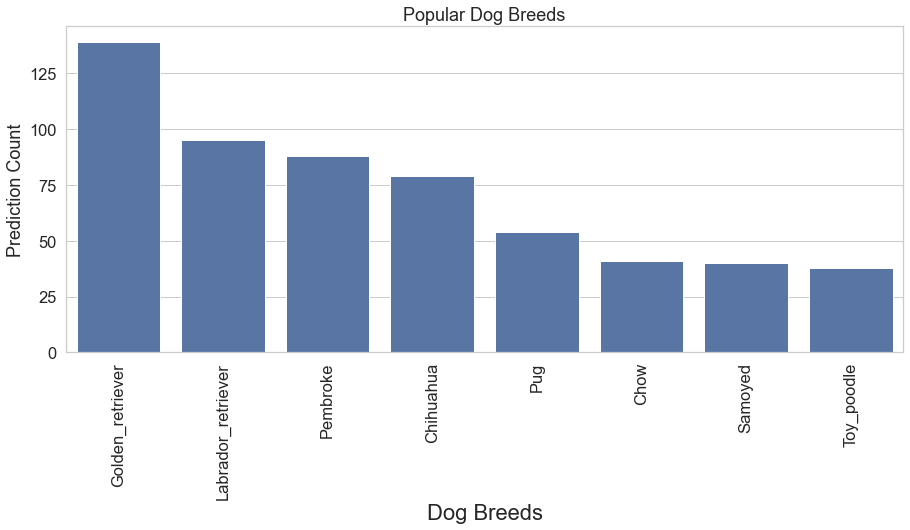

In [123]:
#PLOTTING A BARCHART TO SHOW THE MOST POPULAR DOG BREEDS
plt.figure(figsize = (15,6))
base_color = sb.color_palette()[0]
sb.set_style('whitegrid')
sb.barplot(data = twitter_clean, x = twitter_clean.first_prediction.value_counts()[0:8].index,
            y = twitter_clean.first_prediction.value_counts()[0:8], color = base_color);
plt.xticks(rotation=90);
sb.set(font_scale = 2);
plt.xlabel("Dog Breeds",fontsize = 22);
plt.ylabel("Prediction Count",fontsize = 18);
plt.title("Popular Dog Breeds",fontsize = 18);    

## Most Popular Dog Stage by Retweet Count

In [124]:
# Generating a copy of the dataframe
df_stage=twitter_clean.copy()

# Fetching the count of unique stages
print('Count of the Unique Dog breeds is : ', df_stage['stage'].nunique())

Count of the Unique Dog breeds is :  5


In [125]:
df_stage.stage.value_counts()[0:5]
frequency_dict = df_stage.stage.value_counts().to_dict()
frequency = pd.DataFrame(list(frequency_dict.items()), columns = ['stage', 'frequency'])
frequency

,stage,frequency
0,pupper,203
1,doggo,63
2,puppo,22
3,"doggo, pupper",11
4,floofer,7


In [126]:
# Generating a new field "total_retweet"
total_retwt =[]
for i in frequency.stage:
    tr = twitter_clean[twitter_clean.stage == i]['retweet_count'].sum()
    total_retwt.append(tr)

frequency['total_retweets'] = total_retwt
frequency

,stage,frequency,total_retweets
0,pupper,203,387192.0
1,doggo,63,369920.0
2,puppo,22,117044.0
3,"doggo, pupper",11,49990.0
4,floofer,7,27851.0


In [127]:
# Calculating the retweet mean
frequency['retweet_mean']=frequency['total_retweets']//frequency['frequency']
frequency

,stage,frequency,total_retweets,retweet_mean
0,pupper,203,387192.0,1907.0
1,doggo,63,369920.0,5871.0
2,puppo,22,117044.0,5320.0
3,"doggo, pupper",11,49990.0,4544.0
4,floofer,7,27851.0,3978.0


In [128]:
#Remove doggopuppo and doggofloofer stages as they will cause outliers due to their frequency being one
frequency = frequency[0:5]
frequency

,stage,frequency,total_retweets,retweet_mean
0,pupper,203,387192.0,1907.0
1,doggo,63,369920.0,5871.0
2,puppo,22,117044.0,5320.0
3,"doggo, pupper",11,49990.0,4544.0
4,floofer,7,27851.0,3978.0


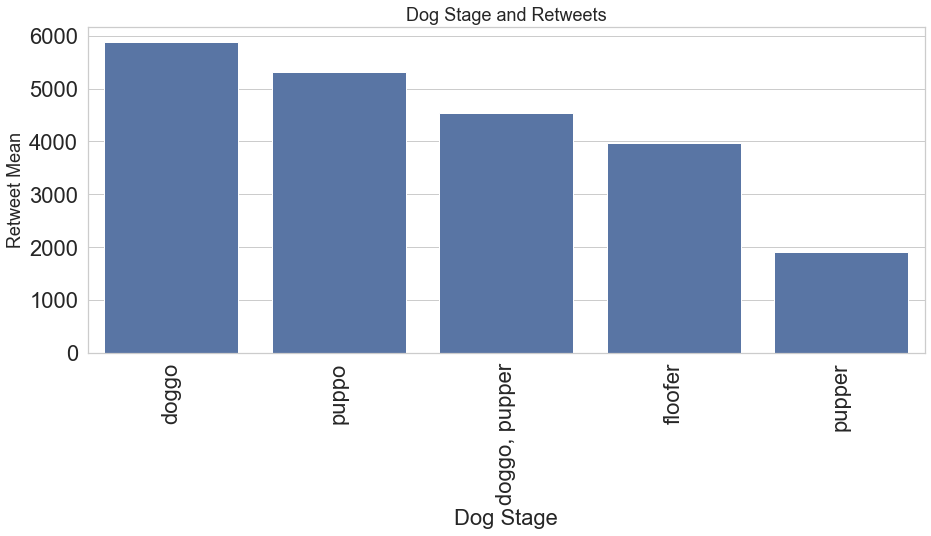

In [129]:
sb.set_style('whitegrid')
plt.figure(figsize = (15,6))
sb.barplot(data = frequency, x = frequency.stage, y = frequency.retweet_mean, color = base_color, 
           order = frequency.sort_values('retweet_mean', ascending = False).stage);
plt.xticks(rotation=90);
sb.set(font_scale = 2);
plt.xlabel("Dog Stage",fontsize = 22);
plt.ylabel("Retweet Mean",fontsize = 18);
plt.title("Dog Stage and Retweets",fontsize = 18); 

## Most Popular Dog Stage by Retweet Count

In [130]:
# Generating a copy of the dataframe
df_breed=twitter_clean.copy()

# Fetching the count of unique stages
print('Count of the Unique Dog breeds is : ', df_breed['first_prediction'].nunique())

Count of the Unique Dog breeds is :  374


In [131]:
df_breed.first_prediction.value_counts()
breed_frequency_dict = df_breed.first_prediction.value_counts().to_dict()
breed_frequency = pd.DataFrame(list(breed_frequency_dict.items()), columns = ['first_prediction', 'frequency'])
breed_frequency

,first_prediction,frequency
0,Golden_retriever,139
1,Labrador_retriever,95
2,Pembroke,88
3,Chihuahua,79
4,Pug,54
...,...,...
369,Nail,1
370,Timber_wolf,1
371,Espresso,1
372,Bib,1


In [132]:
# Generating a new field "total_likes"
total_like = []
for i in breed_frequency.first_prediction:
    tl = twitter_clean[twitter_clean.first_prediction == i]['favorite_count'].sum()
    total_like.append(tl)
    
breed_frequency['total_likes'] = total_like

In [133]:
# Generating a new field "like_mean"
breed_frequency['like_mean'] = breed_frequency.total_likes // breed_frequency.frequency
breed_frequency

,first_prediction,frequency,total_likes,like_mean
0,Golden_retriever,139,1474527.0,10608.0
1,Labrador_retriever,95,909872.0,9577.0
2,Pembroke,88,866837.0,9850.0
3,Chihuahua,79,597879.0,7568.0
4,Pug,54,271018.0,5018.0
...,...,...,...,...
369,Nail,1,5046.0,5046.0
370,Timber_wolf,1,4096.0,4096.0
371,Espresso,1,7423.0,7423.0
372,Bib,1,609.0,609.0


In [134]:
#Visualize only the top 10 breeds
breed_frequency = breed_frequency.sort_values(['frequency', 'total_likes'], ascending = False).iloc[0:10]

In [135]:
breed_frequency

,first_prediction,frequency,total_likes,like_mean
0,Golden_retriever,139,1474527.0,10608.0
1,Labrador_retriever,95,909872.0,9577.0
2,Pembroke,88,866837.0,9850.0
3,Chihuahua,79,597879.0,7568.0
4,Pug,54,271018.0,5018.0
5,Chow,41,353200.0,8614.0
6,Samoyed,40,447579.0,11189.0
8,Pomeranian,38,264319.0,6955.0
7,Toy_poodle,38,202421.0,5326.0
9,Malamute,29,216781.0,7475.0


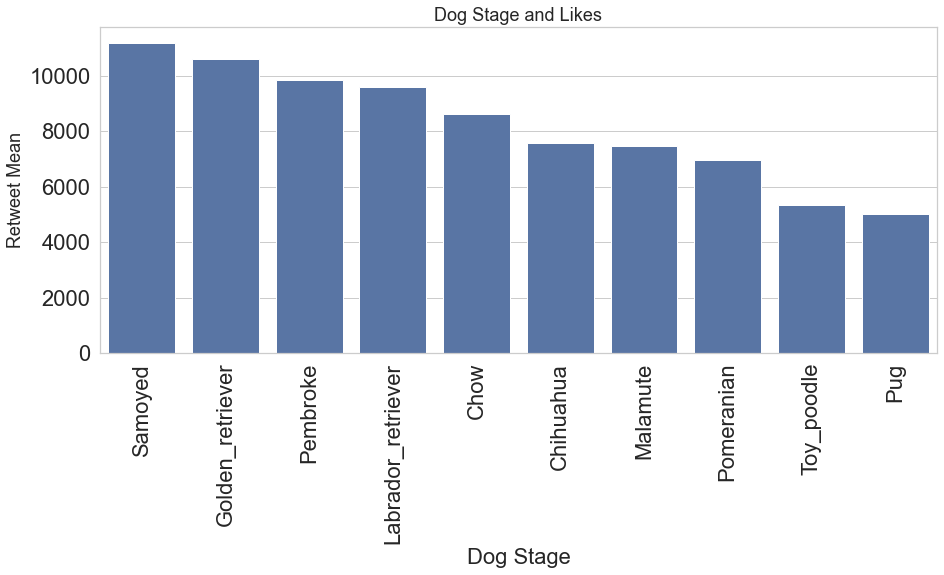

In [136]:
sb.set_style('whitegrid')
plt.figure(figsize = (15,6))
sb.barplot(data = breed_frequency, x = breed_frequency.first_prediction, y = breed_frequency.like_mean, color = base_color, 
           order = breed_frequency.sort_values('like_mean', ascending = False).first_prediction);
plt.xticks(rotation=90);
sb.set(font_scale = 1.5)
plt.xlabel("Dog Stage",fontsize = 22);
plt.ylabel("Retweet Mean",fontsize = 18);
plt.title("Dog Stage and Likes",fontsize = 18); 

### Insights:
1.Golden retriever is the most popular dog breed

2.Puppo stage is the most popular by retweet count

3.Samoyed breed is the most popular by favorite count